In [23]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [24]:
iris = load_iris()
X = iris.data
y = iris.target

model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_samples=0.7, max_features=0.75, random_state=123, oob_score=True)

# 1
cv_scoret = cross_val_score(model, X, y, cv=10)

# 2
model.fit(X, y)
oob_score = model.oob_score_

print(f'Fold-specific accuracies: {cv_scoret}')
'''print(f'Overall accuracy: {cv_scoret.mean():.4f}')'''

print(f'Overall accuracy (Criss Validatio): {cv_scoret.mean():.4f}')
print(f'Overall accuracy (OOB): {oob_score:.4f}')

Fold-specific accuracies: [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]
Overall accuracy (Criss Validatio): 0.9600
Overall accuracy (OOB): 0.9600


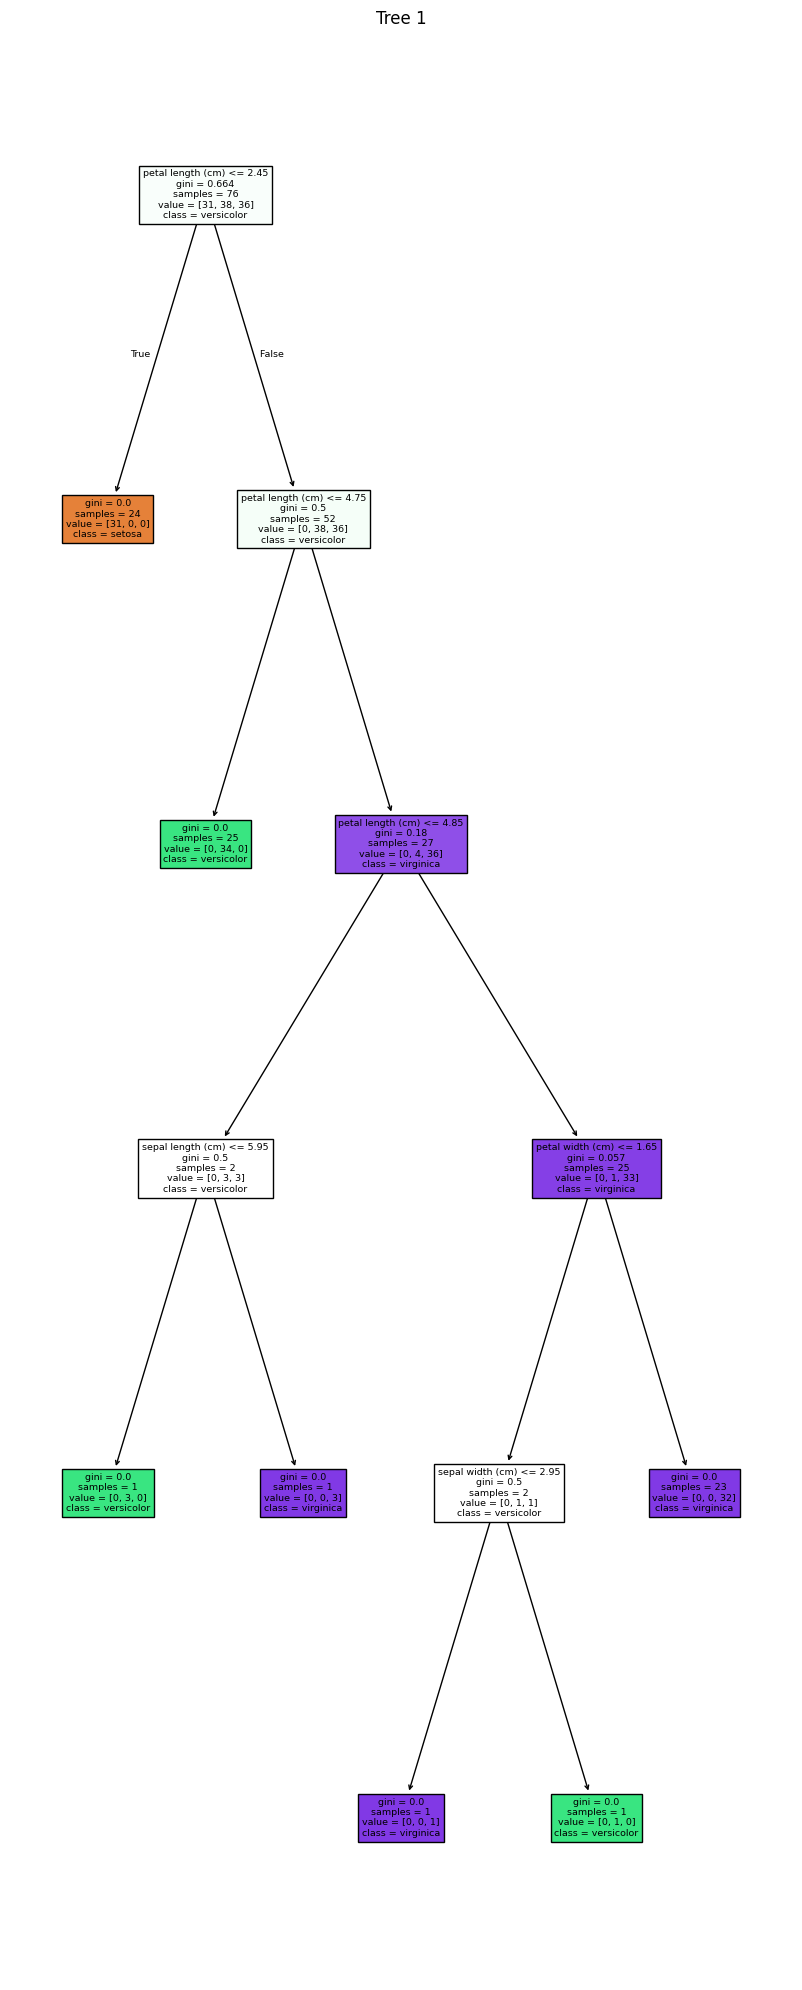

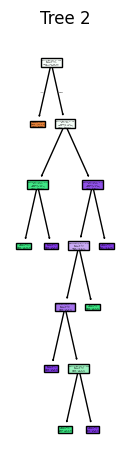

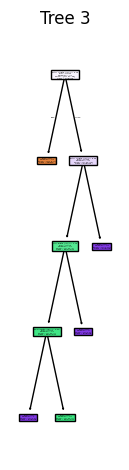

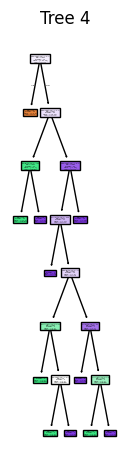

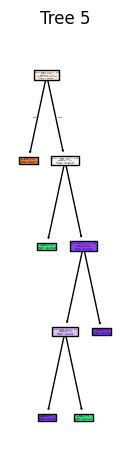

In [25]:
iris = load_iris()
X = iris.data
y = iris.target

model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_samples=0.7, max_features=0.75, random_state=123)

# 1
model.fit(X, y)

n_trees_to_plot = 5

plt.figure(figsize=(40, 20))

for i in range (n_trees_to_plot):
    plt.subplot(1, n_trees_to_plot, i + 1)
    plot_tree(model.estimators_[i], filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
    plt.title(f'Tree {i + 1}')
    plt.tight_layout()
    plt.show()

In [26]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [27]:
import pandas as pd
df = pd.read_csv('titanic_v2.csv', sep=';')
df.dropna(axis=0, how='any', inplace=True)
display(df)

,pclass,sex,age,survived
0,1,female,29.0000,1
1,1,male,0.9167,1
2,1,female,2.0000,0
3,1,male,30.0000,0
4,1,female,25.0000,0
...,...,...,...,...
1301,3,male,45.5000,0
1304,3,female,14.5000,0
1306,3,male,26.5000,0
1307,3,male,27.0000,0


In [28]:
colnames = df.columns
colnames

Index(['pclass', 'sex', 'age', 'survived'], dtype='object')

In [29]:
df['sex'] = df['sex'].map({'male': 1, 'female': 2})
df.describe()

,pclass,sex,age,survived
count,1046.000000,1046.000000,1046.000000,1046.000000
mean,2.207457,1.370937,29.881135,0.408222
std,0.841497,0.483287,14.413500,0.491740
min,1.000000,1.000000,0.166700,0.000000
25%,1.000000,1.000000,21.000000,0.000000
50%,2.000000,1.000000,28.000000,0.000000
75%,3.000000,2.000000,39.000000,1.000000
max,3.000000,2.000000,80.000000,1.000000


In [31]:
display(df)

,pclass,sex,age,survived
0,1,2,29.0000,1
1,1,1,0.9167,1
2,1,2,2.0000,0
3,1,1,30.0000,0
4,1,2,25.0000,0
...,...,...,...,...
1301,3,1,45.5000,0
1304,3,2,14.5000,0
1306,3,1,26.5000,0
1307,3,1,27.0000,0


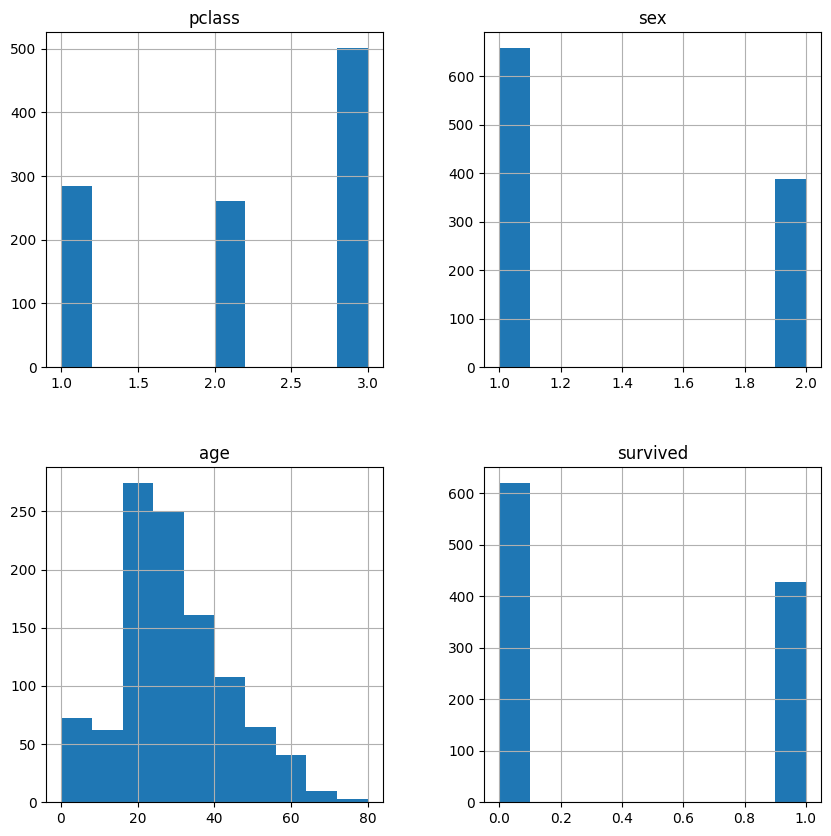

In [33]:
df.hist(figsize=(10, 10))
plt.show()

In [37]:
X = df.loc[:, 'pclass':'age']
y = df.loc[:, 'survived':]
display(y)

,survived
0,1
1,1
2,0
3,0
4,0
...,...
1301,0
1304,0
1306,0
1307,0


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
display(X_train)

,pclass,sex,age
642,3,1,13.0
679,3,2,9.0
526,2,1,29.0
1026,3,2,27.0
120,1,1,43.0
...,...,...,...
697,3,2,30.0
128,1,1,47.0
105,1,2,36.0
119,1,1,50.0


In [40]:
model = RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,
    max_samples=0.7,
    min_samples_leaf=30,
    random_state=123
)

model.fit(X_train, y_train)

C:\Users\onion\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,30
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[186   3]
 [ 62  63]]


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       189
           1       0.95      0.50      0.66       125

    accuracy                           0.79       314
   macro avg       0.85      0.74      0.76       314
weighted avg       0.83      0.79      0.77       314



In [46]:
print(model.feature_importances_)

[0.28484355 0.61249565 0.1026608 ]


In [47]:
model = RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,
    max_samples=0.7,
    min_samples_leaf=30,
    random_state=123,
    oob_score=True
)

model.fit(X_train, y_train)

C:\Users\onion\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,30
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[186   3]
 [ 62  63]]


In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       189
           1       0.95      0.50      0.66       125

    accuracy                           0.79       314
   macro avg       0.85      0.74      0.76       314
weighted avg       0.83      0.79      0.77       314



In [55]:
print(model.oob_score_)

0.7691256830601093


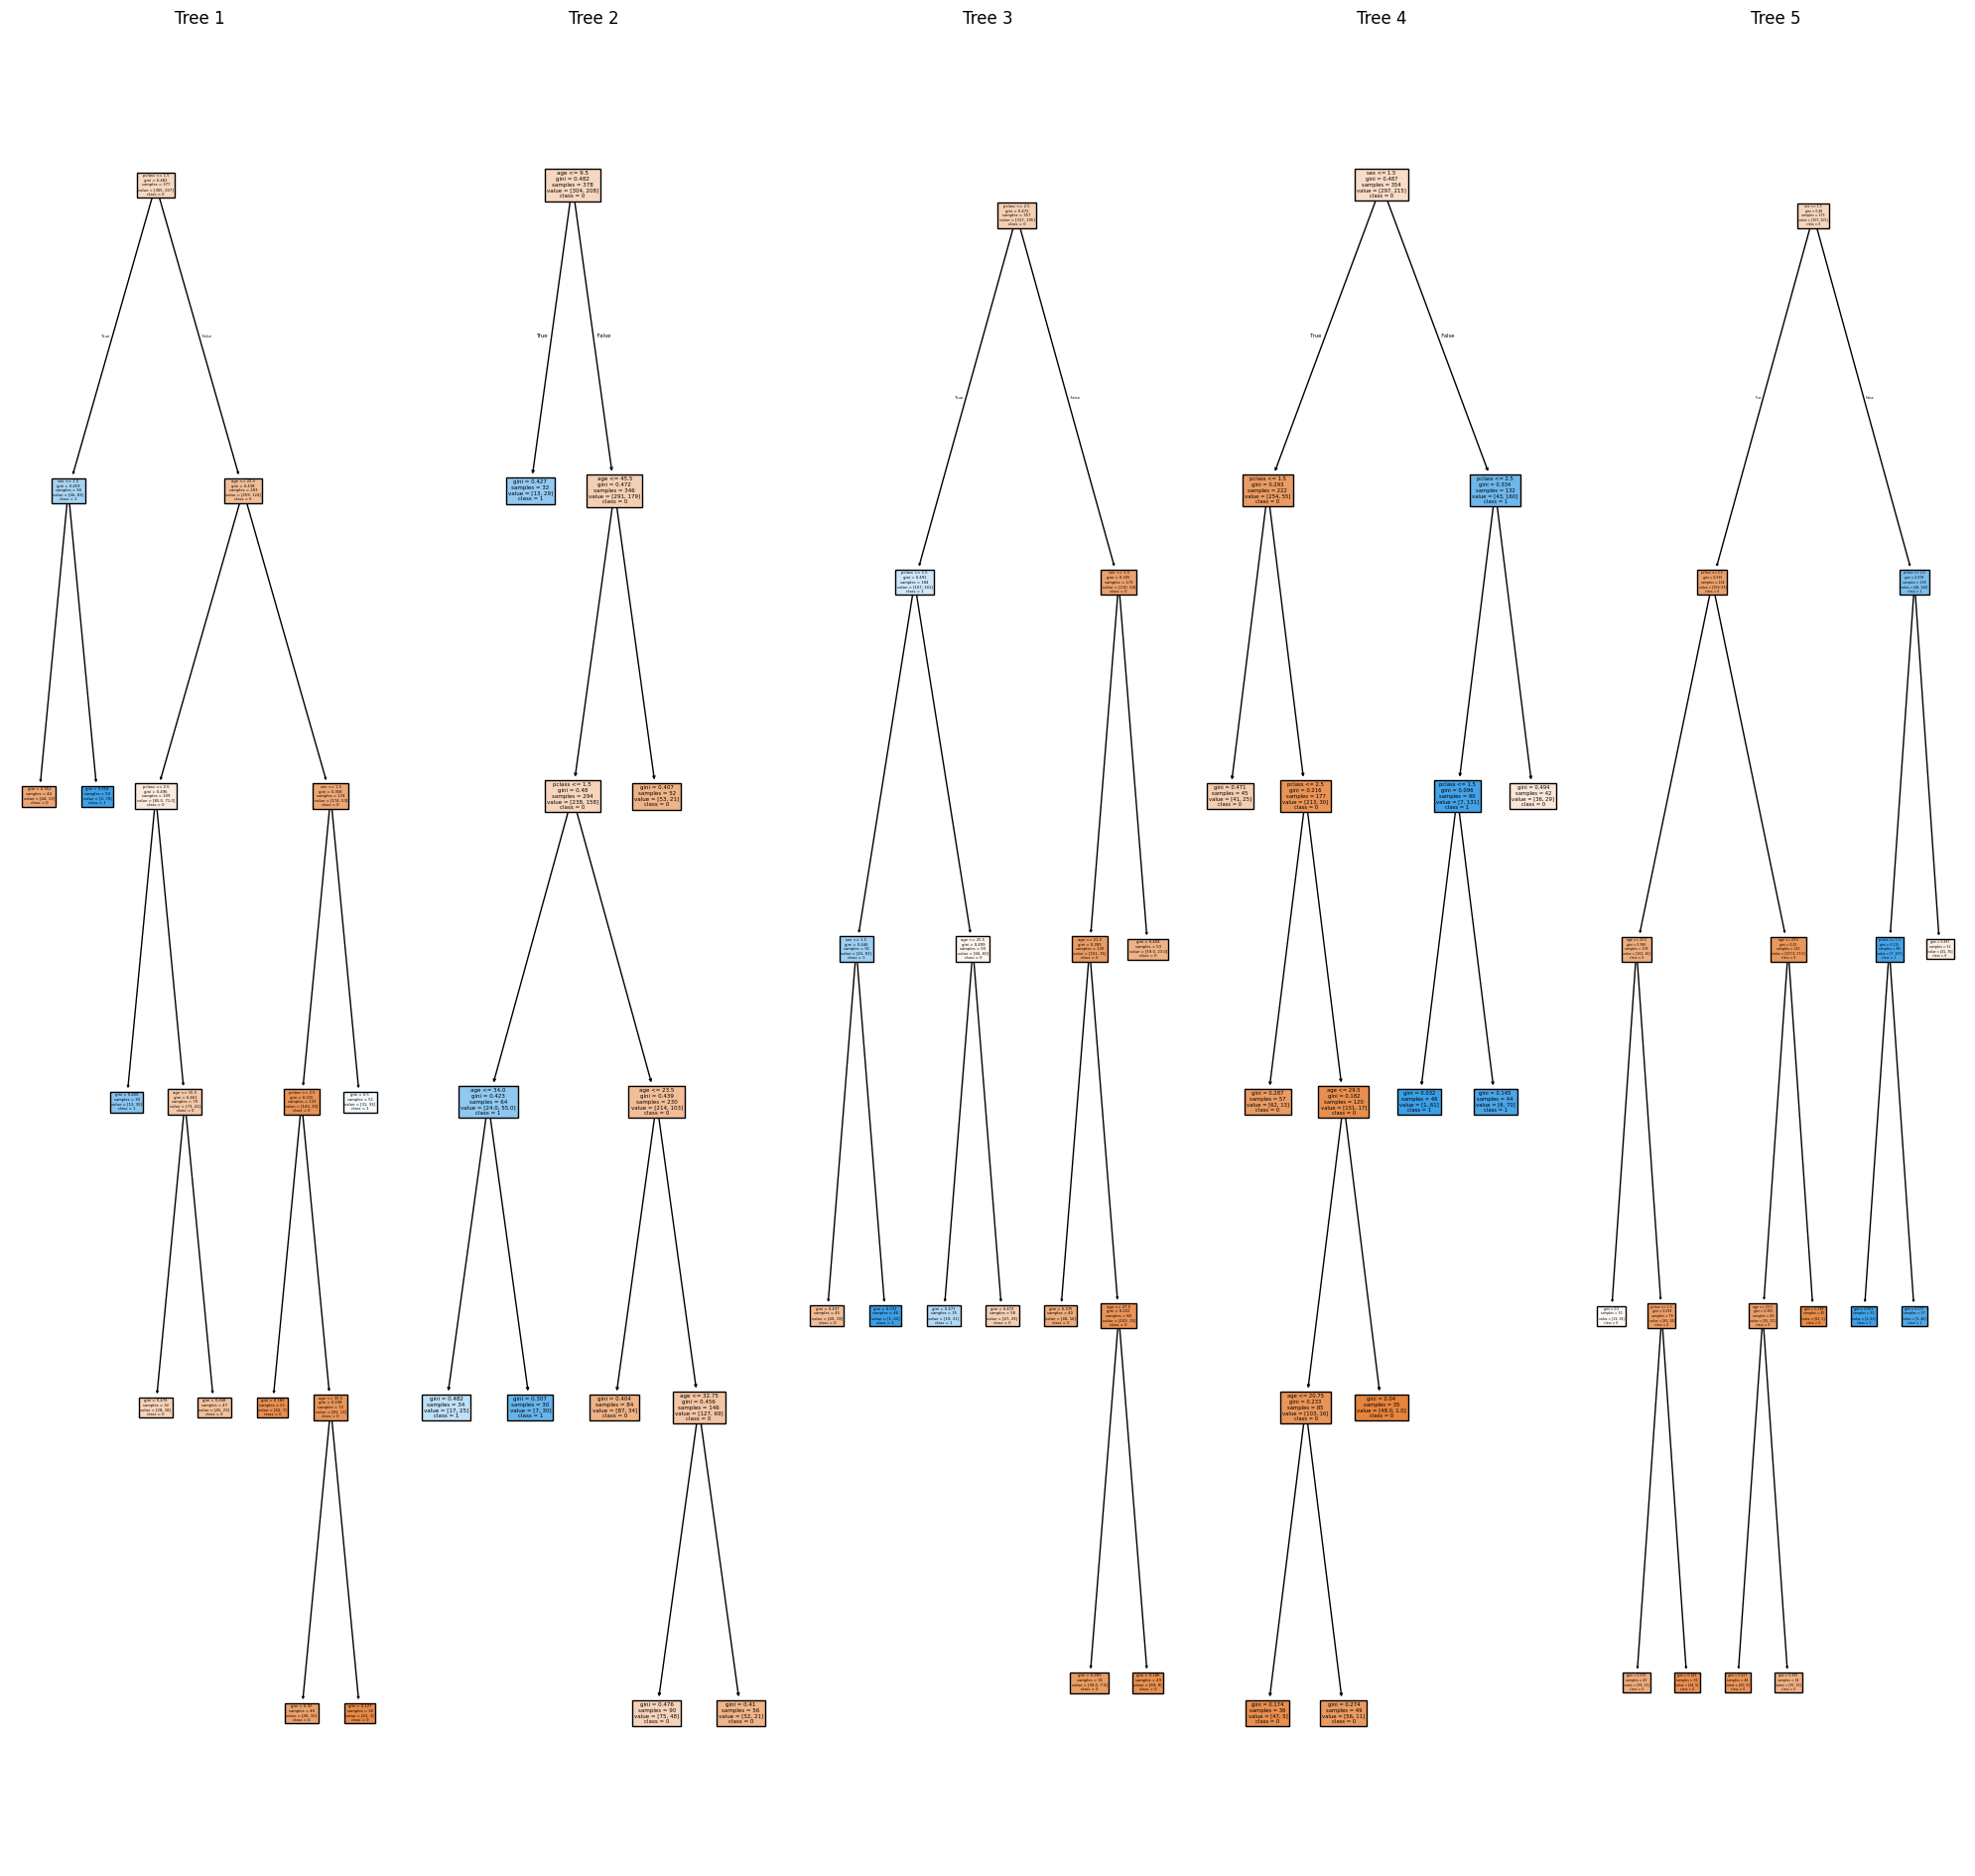

In [57]:
plt.figure(figsize=(20, 19))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plot_tree(
        model.estimators_[i],
        filled=True,
        feature_names=colnames[:-1],
        class_names=['0', '1']
    )
    
    plt.title(f'Tree {i + 1}')
plt.tight_layout()
plt.show()

In [58]:
from sklearn.tree import export_text

tree_text = export_text(model.estimators_[0], feature_names=colnames[:-1].tolist())
with open('tree.txt', 'w') as f:
    f.write(tree_text)